In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Charger les données à partir du fichier XLSX
data = pd.read_excel("C:/Users/Hicham/Downloads/stage_pfa (1)/stage_pfa/donnees_pretraitees.xlsx")
data

,latitude,longitude,annee,mois,P,T,Tmax,Tmin,PET,qm 2089/53 m3/s,...,SP32,SPEI3,SPEI6,SPEI9,SPEI12,SPEI8,SPEI24,SPEI32,3976_SDAT,3976_SDAT.1
0,31.60,-7.89,2005,10,0.370158,19.705213,25.513701,14.587638,97.53070,3.412207,...,-0.650081,0.298091,-0.022897,-0.291383,0.070090,0.573619,0.727782,0.618786,-1.263668,Moderate drought
1,31.60,-7.89,2005,11,1.384117,13.700083,19.156482,8.971692,60.93337,3.402967,...,-0.370277,0.934729,0.617728,-0.279393,0.141402,0.396376,0.744022,0.717839,-1.786156,Severe drought
2,31.60,-7.89,2005,12,0.578791,10.448304,16.737463,5.137598,53.46139,3.528966,...,-0.650381,1.267452,0.936672,-0.084048,-0.009855,0.545056,0.710415,0.709295,-1.786156,Severe drought
3,31.60,-7.89,2006,1,3.321546,7.620673,12.660641,3.052972,46.57970,4.330458,...,-0.145248,2.099497,1.261466,0.661094,0.319099,0.703251,0.860002,0.925075,-1.223971,Moderate drought
4,31.60,-7.89,2006,2,1.610639,10.044053,14.862958,5.819193,55.58756,5.232421,...,-0.062831,2.259225,1.782777,1.285690,0.459719,0.758854,1.008631,1.049456,-0.910410,Mildly drought
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2166,31.35,-7.89,2019,8,0.255598,24.704637,30.823481,18.324241,165.23779,3.248761,...,-0.539309,0.329321,-0.448329,-1.008240,-0.308856,0.662826,0.349655,-0.310231,-1.523566,Severe drought
2167,31.35,-7.89,2019,9,0.725482,21.024431,27.216480,14.726690,127.20718,3.248761,...,-0.497231,0.127618,-0.496259,-0.873597,-0.528196,0.544405,0.456517,-0.350847,-0.487193,Mildly drought
2168,31.35,-7.89,2019,10,0.374141,17.736935,24.480879,11.271172,101.52804,3.248761,...,-0.755099,-1.035343,-1.109518,-1.078516,-0.995338,0.239910,0.481758,-0.502290,-0.794817,Mildly drought
2169,31.35,-7.89,2019,11,0.563202,11.435653,17.750246,5.621209,61.95016,3.248761,...,-0.622150,-1.238466,-0.347661,-0.803123,-1.214897,-0.117245,0.589276,-0.482416,-0.980136,Mildly drought


In [8]:
data['3976_SDAT.1'].value_counts()

Mildly drought      796
Mildly wet          724
Moderate drought    206
Moderately wet      170
Severe drought      105
Severely wet         98
Extremely wet        36
Extreme drought      36
Name: 3976_SDAT.1, dtype: int64

In [9]:
data.head()

,latitude,longitude,annee,mois,P,T,Tmax,Tmin,PET,qm 2089/53 m3/s,...,SP32,SPEI3,SPEI6,SPEI9,SPEI12,SPEI8,SPEI24,SPEI32,3976_SDAT,3976_SDAT.1
0,31.6,-7.89,2005,10,0.370158,19.705213,25.513701,14.587638,97.53070,3.412207,...,-0.650081,0.298091,-0.022897,-0.291383,0.070090,0.573619,0.727782,0.618786,-1.263668,Moderate drought
1,31.6,-7.89,2005,11,1.384117,13.700083,19.156482,8.971692,60.93337,3.402967,...,-0.370277,0.934729,0.617728,-0.279393,0.141402,0.396376,0.744022,0.717839,-1.786156,Severe drought
2,31.6,-7.89,2005,12,0.578791,10.448304,16.737463,5.137598,53.46139,3.528966,...,-0.650381,1.267452,0.936672,-0.084048,-0.009855,0.545056,0.710415,0.709295,-1.786156,Severe drought
3,31.6,-7.89,2006,1,3.321546,7.620673,12.660641,3.052972,46.57970,4.330458,...,-0.145248,2.099497,1.261466,0.661094,0.319099,0.703251,0.860002,0.925075,-1.223971,Moderate drought
4,31.6,-7.89,2006,2,1.610639,10.044053,14.862958,5.819193,55.58756,5.232421,...,-0.062831,2.259225,1.782777,1.285690,0.459719,0.758854,1.008631,1.049456,-0.910410,Mildly drought


In [43]:
data.columns

Index(['latitude', 'longitude', 'annee', 'mois', 'P', 'T', 'Tmax', 'Tmin',
       'PET', 'qm 2089/53 m3/s', 'SPI3', 'SPI6', 'SPI9', 'SPI12', 'SPI8',
       'SP24', 'SP32', 'SPEI3', 'SPEI6', 'SPEI9', 'SPEI12', 'SPEI8', 'SPEI24',
       'SPEI32', '3976_SDAT', '3976_SDAT.1'],
      dtype='object')

In [10]:
data.shape

(2171, 26)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2171 entries, 0 to 2170
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   latitude         2171 non-null   float64
 1   longitude        2171 non-null   float64
 2   annee            2171 non-null   int64  
 3   mois             2171 non-null   int64  
 4   P                2171 non-null   float64
 5   T                2171 non-null   float64
 6   Tmax             2171 non-null   float64
 7   Tmin             2171 non-null   float64
 8   PET              2171 non-null   float64
 9   qm 2089/53 m3/s  2171 non-null   float64
 10  SPI3             2171 non-null   float64
 11  SPI6             2171 non-null   float64
 12  SPI9             2171 non-null   float64
 13  SPI12            2171 non-null   float64
 14  SPI8             2171 non-null   float64
 15  SP24             2171 non-null   float64
 16  SP32             2171 non-null   float64
 17  SPEI3         

In [12]:
# describing the dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,2171.0,31.472179,0.124997,31.350000,31.350000,31.350000,31.600000,31.600000
longitude,2171.0,-8.237075,0.321004,-8.640000,-8.640000,-8.140000,-7.890000,-7.890000
annee,2171.0,1999.029019,10.755969,1981.000000,1990.000000,1998.000000,2008.000000,2019.000000
mois,2171.0,6.527867,3.461644,1.000000,4.000000,7.000000,10.000000,12.000000
P,2171.0,0.951600,1.244160,0.000000,0.104801,0.478249,1.330968,12.190200
T,2171.0,17.270965,5.715131,4.660733,12.484385,16.593437,22.244157,29.753666
Tmax,2171.0,23.265357,6.040869,9.519592,18.231792,22.473068,28.322352,37.766374
Tmin,2171.0,11.614775,5.263417,-0.354642,7.350029,11.199915,16.243813,23.074612
PET,2171.0,111.027454,47.029920,40.795400,63.799800,106.900800,151.524370,225.685340
qm 2089/53 m3/s,2171.0,3.397950,7.535591,0.000000,0.368174,1.496088,3.248761,106.427667


In [13]:
data.isnull().sum()

latitude           0
longitude          0
annee              0
mois               0
P                  0
T                  0
Tmax               0
Tmin               0
PET                0
qm 2089/53 m3/s    0
SPI3               0
SPI6               0
SPI9               0
SPI12              0
SPI8               0
SP24               0
SP32               0
SPEI3              0
SPEI6              0
SPEI9              0
SPEI12             0
SPEI8              0
SPEI24             0
SPEI32             0
3976_SDAT          0
3976_SDAT.1        0
dtype: int64

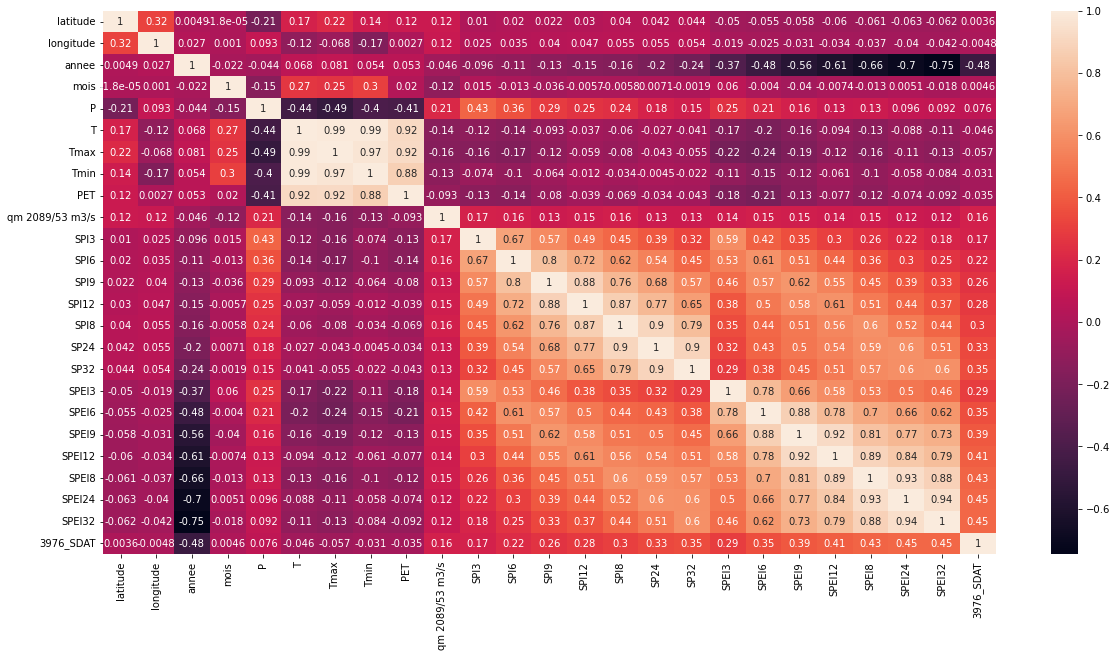

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)
plt.ioff()

<AxesSubplot:xlabel='3976_SDAT.1', ylabel='count'>

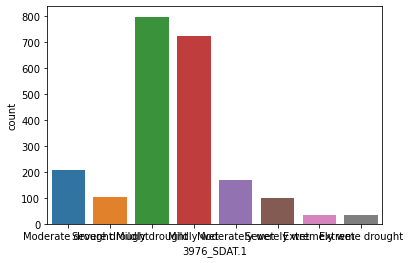

In [15]:
# Target variable
sns.countplot(data['3976_SDAT.1'])

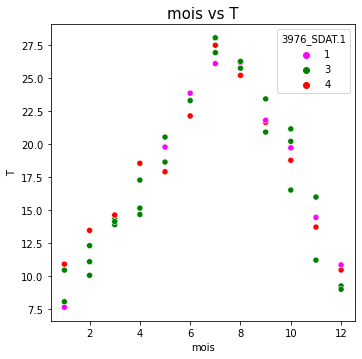

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already read the Excel file into the variable `data`
data = pd.read_excel("C:/Users/Hicham/Downloads/stage_pfa/stage_pfa/donnees_pretraitees.xlsx")

# Selecting the first 50 rows from the DataFrame
data_subset = data.head(50)

# Color palette with ten colors for ten categories
palette = {
    0: 'lightblue',
    1: 'magenta',
    2: 'white',
    3: 'green',
    4: 'red',
    5: 'cyan',
    6: 'yellow',
    7: 'purple',
    8: 'orange',
    9: 'gray',
}

fig = plt.figure(figsize=(12, 12))

def plot_scatter(a, b, k):
    plt.subplot(k)
    sns.scatterplot(x=data_subset[a], y=data_subset[b], hue="3976_SDAT.1",
                    data=data_subset, palette=palette)
    plt.title(a + ' vs ' + b, fontsize=15)

plot_scatter('mois', 'T', 221)
plt.show()


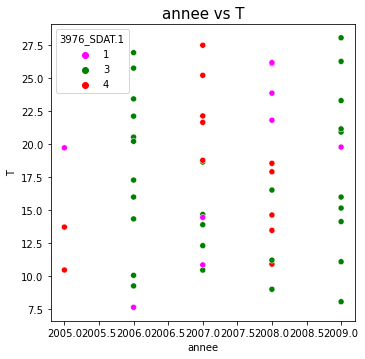

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already read the Excel file into the variable `data`
data = pd.read_excel("C:/Users/Hicham/Downloads/stage_pfa/stage_pfa/donnees_pretraitees.xlsx")

# Selecting the first 50 rows from the DataFrame
data_subset = data.head(50)

# Color palette with ten colors for ten categories
palette = {
    0: 'lightblue',
    1: 'magenta',
    2: 'white',
    3: 'green',
    4: 'red',
    5: 'cyan',
    6: 'yellow',
    7: 'purple',
    8: 'orange',
    9: 'gray',
}

fig = plt.figure(figsize=(12, 12))

def plot_scatter(a, b, k):
    plt.subplot(k)
    sns.scatterplot(x=data_subset[a], y=data_subset[b], hue="3976_SDAT.1",
                    data=data_subset, palette=palette)
    plt.title(a + ' vs ' + b, fontsize=15)

plot_scatter('annee', 'T', 221)
plt.show()


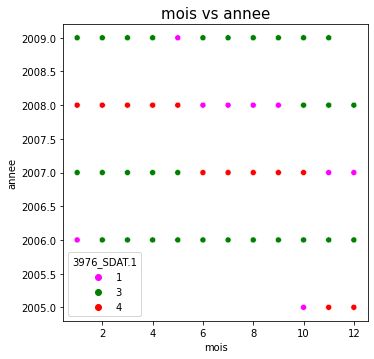

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already read the Excel file into the variable `data`
data = pd.read_excel("C:/Users/Hicham/Downloads/stage_pfa/stage_pfa/donnees_pretraitees.xlsx")

# Selecting the first 50 rows from the DataFrame
data_subset = data.head(50)

# Color palette with ten colors for ten categories
palette = {
    0: 'lightblue',
    1: 'magenta',
    2: 'white',
    3: 'green',
    4: 'red',
    5: 'cyan',
    6: 'yellow',
    7: 'purple',
    8: 'orange',
    9: 'gray',
}

fig = plt.figure(figsize=(12, 12))

def plot_scatter(a, b, k):
    plt.subplot(k)
    sns.scatterplot(x=data_subset[a], y=data_subset[b], hue="3976_SDAT.1",
                    data=data_subset, palette=palette)
    plt.title(a + ' vs ' + b, fontsize=15)

plot_scatter('mois', 'annee', 221)
plt.show()


In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

# Charger les données à partir du fichier XLSX
data = pd.read_excel("C:/Users/Hicham/Downloads/stage_pfa (1)/stage_pfa/donnees_pretraitees.xlsx")

# Préparer les données pour l'entraînement
X = data.drop("3976_SDAT.1", axis=1)
y = data["3976_SDAT.1"]

# Instancier l'objet StandardScaler
scaler = StandardScaler()

# Mettre à l'échelle les données
X_scaled = scaler.fit_transform(X)

# Définir les différents modèles de classification
models = [
    SVC(),
    RandomForestClassifier(),
    LogisticRegression()
]

# Appliquer la validation croisée pour chaque modèle et obtenir les précisions
accuracies = []
for model in models:
    scores = cross_val_score(model, X_scaled, y, cv=5)
    accuracies.append(scores.mean())

# Afficher les précisions moyennes des différents modèles
for i, model in enumerate(models):
    print(f"Modèle {i+1}: {model.__class__.__name__}")
    print(f"Précision moyenne : {accuracies[i]}")
    print("---")

# Identifier le modèle avec la meilleure précision
best_model_index = np.argmax(accuracies)
best_model = models[best_model_index]
print(f"Meilleur modèle : {best_model.__class__.__name__}")
print(f"Précision moyenne : {accuracies[best_model_index]}")

# Ajuster le meilleur modèle sur les données d'entraînement
best_model.fit(X_scaled, y)

# Préparer les nouvelles données pour la prédiction
new_data = np.array([[31.6, -7.89, 2005, 11, 1.38411699256653, 13.700083335428, 19.1564819406096, 8.97169234928539,60.93337,3.4029667,
                     0.0680574563, 0.1520515246, -1.3961724049, -1.4306594313,-1.493087838, -1.199867, -0.3702765699,
                     0.934728734,0.6177281796, -0.2793932181, 0.141402116, 0.396376122,0.7440220674,0.7178385749,
                      -1.78615556126108]])

# Effectuer la mise à l'échelle des nouvelles données
new_data_scaled = scaler.transform(new_data)

# Effectuer
prediction = best_model.predict(new_data_scaled)

# Afficher le résultat de la prédiction
print("Résultat de la prédiction :", prediction)

Modèle 1: SVC
Précision moyenne : 0.7111785581863446
---
Modèle 2: RandomForestClassifier
Précision moyenne : 0.8806885957942686
---
Modèle 3: LogisticRegression
Précision moyenne : 0.8065384819111182
---
Meilleur modèle : RandomForestClassifier
Précision moyenne : 0.8806885957942686
Résultat de la prédiction : ['Severe drought']


In [20]:
import pickle
filename = 'savedmodel.sav'
pickle.dump(best_model, open(filename,'wb'))

In [21]:
load_model = pickle.load(open(filename, 'rb'))

In [25]:
load_model.predict([[31.6, -7.89, 2005, 11, 1.38411699256653, 13.700083335428, 19.1564819406096, 8.97169234928539,60.93337,3.4029667,
                     0.0680574563, 0.1520515246, -1.3961724049, -1.4306594313,-1.493087838, -1.199867, -0.3702765699,
                     0.934728734,0.6177281796, -0.2793932181, 0.141402116, 0.396376122,0.7440220674,0.7178385749,
                      -1.78615556126108]])

array(['Moderate drought'], dtype=object)